In [108]:
import pandas as pd
import numpy as np
import random 
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [11]:
##Reading data from dataset of uci.edu
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data")

In [16]:
df.head(10)

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
5,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
7,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
8,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
9,X,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7


In [52]:
##Dividing to 10 samples
samples = []
for i in range(10):
    data = df.sample(1999,random_state=i*10)
    samples.append(data)
print(samples)


[       T  2   8  3  5   1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  8.4
11003  F  5   9  7  7   3    5  13  4  5   13   7    3    1   10    2    6
4981   V  5   9  5  7   4    3  11  2  3    9  11    8    3   12    1    7
16642  K  4   8  4  5   2    3   8  8  2    7   5   11    4    8    3   10
8595   Z  5   8  7  6   5    9   8  6  4    7   5    8    3    8   10    7
19161  U  5  10  6  8   4    6   8  6  7    6  10    9    3    9    1    7
...   .. ..  .. .. ..  ..  ...  .. .. ..  ...  ..  ...  ...  ...  ...  ...
4048   P  6  11  6  8   3    4  13  9  2   10   6    4    1   10    4    8
4066   A  8  12  8  6   4   11   0  4  3   12   6   14    4    5    5   11
10126  K  5  10  8  8   9    6   6  4  4    6   5    9    8    7    8    8
346    W  4   4  5  3   3    6  11  5  2    8   7    6    6   11    2    6
952    S  6  10  9  8  11    6   7  3  2    7   5    6    3    8   11    4

[1999 rows x 17 columns],        T   2   8   3  5  1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  

In [53]:
##Checking length of sample
len(samples)

10

In [117]:
kernels=['linear','rbf','poly','sigmoid']
bestkernel=[]
bestnu=[]
bestaccuracy=[]
bestepsilon=[]
acc=[]

##Defining function that returns accuracy on given data and parameters
def calc_accuracy(kern,value_nu,X_train,X_test,y_train,y_test):
    clf = NuSVC(nu=value_nu,kernel=kern,tol=eps)
    clf.fit(X_train,y_train)
    y_predict=clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)*100
    return accuracy

##Finding best parameter for each sample from 1000 iterations
for i in range(len(samples)):
    X=samples[i].loc[:,samples[i].columns!='T']
    y=samples[i]['T']
    maxac=-9999
    bestkern=''
    bestn=0
    bestepsil=0
    acculist=[]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    for k in range(1000):
        kern=random.choice(kernels)
        value_nu=random.uniform(0,0.1)
        eps=random.uniform(0,1)
        try:
            accu=calc_accuracy(kern,value_nu,X_train,X_test,y_train,y_test)
        except:
            k=k-1    
        acculist.append(accu)
        if(accu>maxac):
            maxac=accu
            bestkern=kern
            bestn=value_nu
            bestepsil=eps
    bestkernel.append(bestkern)
    bestnu.append(bestn)
    bestaccuracy.append(maxac)
    acc.append(acculist)
    bestepsilon.append(bestepsil)
         


In [118]:
##Creating dataframe for best accuracy of 10 samples on 1000 iterations
samplename=['Sample 1','Sample 2','Sample 3','Sample 4','Sample 5','Sample 6','Sample 7','Sample 8','Sample 9','Sample 10']
tabledata={'Sample#':samplename,'Best Accuracy':bestaccuracy,'Best kernel':bestkernel,'Best nu':bestnu,'Best Epsilon':bestepsilon}
table=pd.DataFrame(tabledata)

In [119]:
table

,Sample#,Best Accuracy,Best kernel,Best nu,Best Epsilon
0,Sample 1,85.833333,rbf,0.065017,0.024063
1,Sample 2,86.666667,rbf,0.074231,0.045838
2,Sample 3,84.666667,rbf,0.082086,0.050709
3,Sample 4,87.166667,rbf,0.040678,0.010766
4,Sample 5,85.000000,rbf,0.053370,0.021895
5,Sample 6,88.166667,rbf,0.029818,0.010533
6,Sample 7,87.166667,rbf,0.021568,0.000991
7,Sample 8,86.500000,rbf,0.044502,0.015352
8,Sample 9,85.166667,rbf,0.066311,0.018434
9,Sample 10,84.833333,rbf,0.085287,0.002648


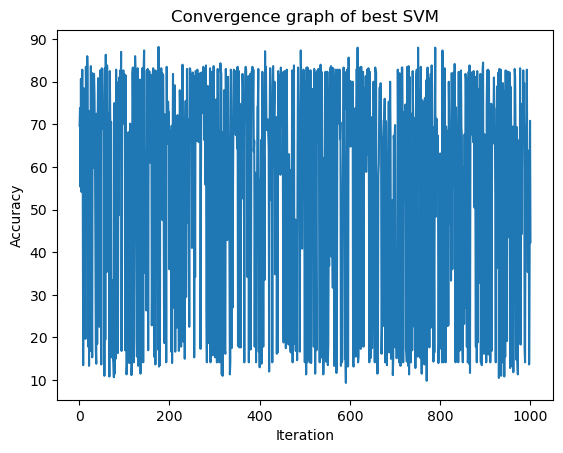

In [120]:
##Finding index of best accuracy
maxindex = table['Best Accuracy'].idxmax()
itr=list(range(1, 1001))

##Plotting convergence graph of best SVM
plt.plot(itr,acc[maxindex])
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Convergence graph of best SVM')
plt.show()

## Data Analytics

In [121]:
##To find no of rows
df.shape[0]

19999

In [122]:
##To find no of columns
df.shape[1]

17

In [123]:
df.head(10)

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
5,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
7,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
8,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
9,X,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7


In [124]:
##To get no of classes
len(df['T'].unique())

26

In [130]:
##summary statistics
df.describe()

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.00000
mean,4.023651,7.035452,5.121956,5.372469,3.505975,6.897545,7.500175,4.628831,5.178609,8.282164,6.453823,7.928996,3.046252,8.338867,3.691935,7.80119
std,1.913206,3.304631,2.014568,2.261445,2.190441,2.026071,2.325087,2.699837,2.380875,2.488485,2.631016,2.080671,2.332500,1.546759,2.567004,1.61751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000


In [128]:
##To check null values
df.isnull().sum()

T      0
2      0
8      0
3      0
5      0
1      0
8.1    0
13     0
0      0
6      0
6.1    0
10     0
8.2    0
0.1    0
8.3    0
0.2    0
8.4    0
dtype: int64

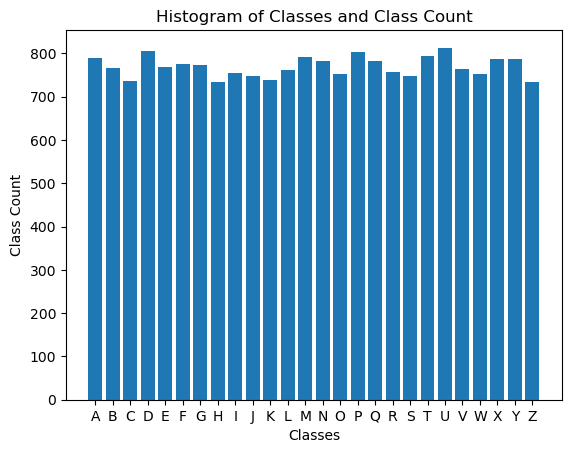

In [125]:
##To Check dataset is balanced or not
dict={}
classes=df['T'].unique()
for c in classes:
    dict[c]=df['T'].value_counts()[c]
dict
myKeys = list(dict.keys())
myKeys.sort()
sorted_dict = {i: dict[i] for i in myKeys}
classes=sorted_dict.keys()
classes
classescount=sorted_dict.values()
plt.bar(classes, classescount)
plt.xlabel('Classes')
plt.ylabel('Class Count')
plt.title('Histogram of Classes and Class Count')
plt.show()



### As we can see from histogram dataset is balanced